# Домашнее задание 4
---

## Задание 1. Аппроксимация функции

In [1]:
%matplotlib inline
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Дополнительные функции

In [2]:
# Исхоодная функция f(x)
def f(x: np.ndarray) -> np.ndarray:
    return np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)

# Вычисление приближения через многочлен
def f_approx(x: np.ndarray, w: np.ndarray) -> np.ndarray:
    y = np.array([0]*x.size, dtype=np.float64)
    for i in range(x.size):
        n = 0
        for wi in w:
            y[i] += wi * x[i]**n
            n += 1
    return y

# Возвращает матрицу коэффициентов A
def get_A(x: np.ndarray) -> np.ndarray:
    a = np.zeros((x.size, x.size))
    for i in range(x.size):
        for j in range(x.size):
            a[i, j] = x[i]**j
    return a

In [3]:
# отрезок на котором функция f(x) определена
x_beg, x_end = 1, 15

### Аппроксимация многочленом 1 порядка

In [4]:
x = np.linspace(x_beg, x_end, 2)
A = get_A(x)
b = f(x)
w_1 = linalg.solve(A, b)

Построение графика.

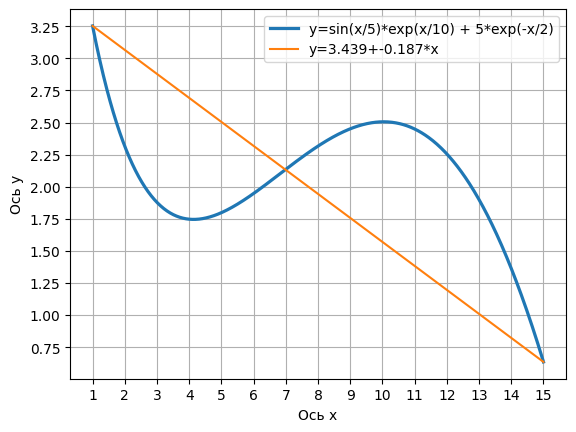

In [5]:
x = np.linspace(1, 15, 1000, dtype=np.float64)
fig, ax = plt.subplots()
ax.set_xlabel("Ось x")
ax.set_ylabel("Ось y")
ax.set_xticks(np.arange(0, 15.1, 1))
ax.set_yticks(np.arange(0, 4, 0.25))
ax.grid()
ax.plot(x, f(x), lw=2.3, label="y=sin(x/5)*exp(x/10) + 5*exp(-x/2)")
ax.plot(x, f_approx(x, w_1), label="y={:.3f}+{:.3f}*x".format(w_1[0], w_1[1]))
ax.legend()

Многочлен 1 степени плохо приближает исходную функцию.

### Аппроксимация многочленом 2 порядка

In [6]:
x = np.linspace(x_beg, x_end, 3)
A = get_A(x)
b = f(x)
w_2 = linalg.solve(A, b)

Построение графика.

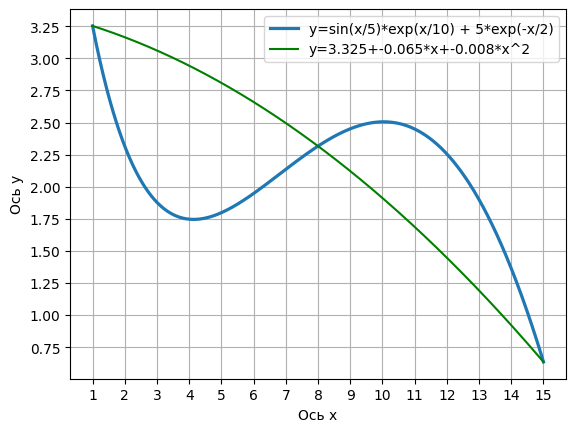

In [7]:
x = np.linspace(1, 15, 1000, dtype=np.float64)
fig, ax = plt.subplots()
ax.set_xlabel("Ось x")
ax.set_ylabel("Ось y")
ax.set_xticks(np.arange(0, 15.1, 1))
ax.set_yticks(np.arange(0, 4, 0.25))
ax.grid()
ax.plot(x, f(x), lw=2.3, label="y=sin(x/5)*exp(x/10) + 5*exp(-x/2)")
ax.plot(x, f_approx(x, w_2), color="green", label="y={:.3f}+{:.3f}*x+{:.3f}*x^2".format(w_2[0], w_2[1], w_2[2]))
ax.legend()

Многочлена 2 порядка также плохо приближает исходную функцию.

### Аппроксимация многочленном 3 порядка

In [8]:
x = np.linspace(x_beg, x_end, 4)
A = get_A(x)
b = f(x)
w_3 = linalg.solve(A, b)

Построение графика.

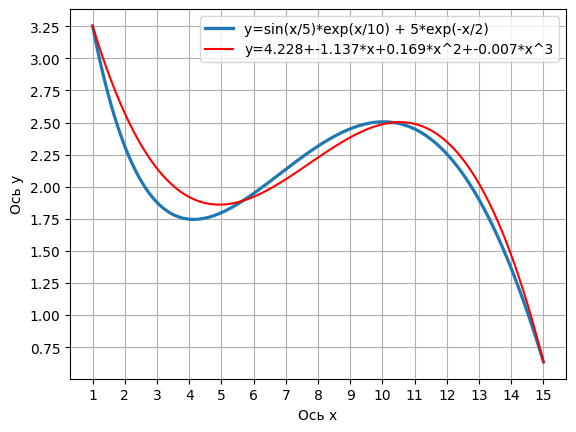

In [9]:
x = np.linspace(1, 15, 1000, dtype=np.float64)
fig, ax = plt.subplots()
ax.set_xlabel("Ось x")
ax.set_ylabel("Ось y")
ax.set_xticks(np.arange(0, 15.1, 1))
ax.set_yticks(np.arange(0, 4, 0.25))
ax.grid()
ax.plot(x, f(x), lw=2.3, label="y=sin(x/5)*exp(x/10) + 5*exp(-x/2)")
ax.plot(x, f_approx(x, w_3), color="red", label="y={:.3f}+{:.3f}*x+{:.3f}*x^2+{:.3f}*x^3".format(w_3[0], w_3[1], w_3[2], w_3[3]))
ax.legend()

При использовании многочлена 3 порядка аппроксимация исходной функции значитльно улучшилась.

In [10]:
# Вывод резултата в файл
with open('submission-2.txt', 'w') as fout:
    fout.write('{} {} {} {}'.format(w_3[0], w_3[1], w_3[2], w_3[3]))

print("Коэффициенты многочлена 3 порядка:\n{} {} {} {}".format(w_3[0], w_3[1], w_3[2], w_3[3]))

Коэффициенты многочлена 3 порядка:
4.227545059100345 -1.1372755725400423 0.16923987085760012 -0.007292492146483281


### Отображение всех аппроксимаций и исходной функции

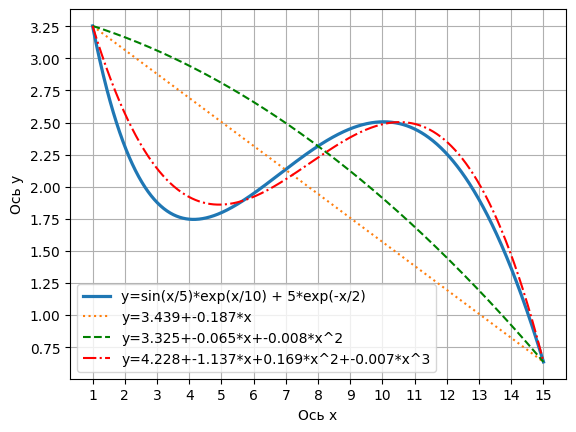

In [11]:
x = np.linspace(1, 15, 1000, dtype=np.float64)
fig, ax = plt.subplots()
ax.set_xlabel("Ось x")
ax.set_ylabel("Ось y")
ax.set_xticks(np.arange(0, 15.1, 1))
ax.set_yticks(np.arange(0, 4, 0.25))
ax.grid()
ax.plot(x, f(x), lw=2.3, label="y=sin(x/5)*exp(x/10) + 5*exp(-x/2)")
ax.plot(x, f_approx(x, w_1), linestyle=":", label="y={:.3f}+{:.3f}*x".format(w_1[0], w_1[1]))
ax.plot(x, f_approx(x, w_2), color="green", linestyle="--", label="y={:.3f}+{:.3f}*x+{:.3f}*x^2".format(w_2[0], w_2[1], w_2[2]))
ax.plot(x, f_approx(x, w_3), color="red", linestyle="-.", label="y={:.3f}+{:.3f}*x+{:.3f}*x^2+{:.3f}*x^3".format(w_3[0], w_3[1], w_3[2], w_3[3]))
ax.legend()

## Задание 2. Сравнение предложений

In [12]:
import numpy as np
import re
from scipy.spatial.distance import cosine

In [13]:
# Читает текст из переданного файла
def get_text(filename: str) -> str:
    text = ""
    with open(filename) as fin:
        text = fin.read()
    return text


# Возвращает список уникальных слов в тексте
def get_words(text: str) -> set[str]:
    return set(filter(lambda x: x != "", re.split(r"[^A-z]", text.lower())))


# Назначает каждому слову уникальный индекс
def get_tokens(words: set[str]) -> dict[str, int]:
    tokens = dict()
    i = 0
    for word in words:
        tokens[word] = i
        i += 1
    return tokens


# Возвращает матрицу n*d, где n - количество предложений, а d - количество уникальных слов в тексте
def get_matrix(text: str, sentence_count: int, tokens: dict[str, int]) -> np.ndarray:
    matrix = np.zeros((sentence_count, len(tokens)))
    i = 0

    for sentence in text.split('\n'):
        words = get_words(sentence)
        for word in words:
            matrix[i, tokens[word]] += 1
        i += 1

    return matrix


# Возвращает номера двух ближайших предложений к первому
def find_closest_sentence(matrix) -> list:
    sentences_sim = []
    for i in range(1, len(matrix)):
        similarity = cosine(matrix[0], matrix[i])
        sentences_sim.append((similarity, i))

    sentences_sim.sort(key=lambda x: (-x[0], x[1]))
    return sentences_sim

In [14]:
FILENAME = 'sentences.txt'
n = 22  # количество предложений

text = get_text(FILENAME)
words = get_words(text)
tokens = get_tokens(words)
matrix = get_matrix(text, n, tokens)

sentences_similarity = find_closest_sentence(matrix)

print("Номера двух ближайших предложений: {} {}".format(sentences_similarity[0][1], sentences_similarity[1][1]))

Номера двух ближайших предложений: 17 18


In [15]:
# Выгрузка в файл
with open('submission-1.txt', 'w') as fout:
    fout.write("{:d} {:d}".format(sentences_similarity[0][1], sentences_similarity[1][1]))

Ближайшие два предложения не совпадают по тематике с первым. Если в первом говориться об одомашнивании кошек и собак, то в ближайшем к нему, по косинусному расстоянию, речь идет об операционной системе OS X Mountain Lion. Во втором, по близости, также речь идет об Apple и патче для разных версий OS X.

In [16]:
print("Номера предложений (по убыванию близости):")
for _, num_sen in sentences_similarity:
    print(num_sen, end=" ")
print()

Номера предложений (по убыванию близости):
17 18 1 15 19 5 7 8 3 9 12 10 11 13 2 14 16 20 21 4 6 


Тематики у следующих по близости предложений совпадают. Так например в четвертом и пятом снова поднимается тема об обновлениях операционной системы OS X. Хотя в третьем речь идет о команде cat в UNIX подобных системах.
